<a href="https://colab.research.google.com/github/ReshmaMasutha/Linear-Algebra-The-Coding-Way/blob/main/eigenvalues%20and%20eigenvectors/EigenValuesVectors_Notebook6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

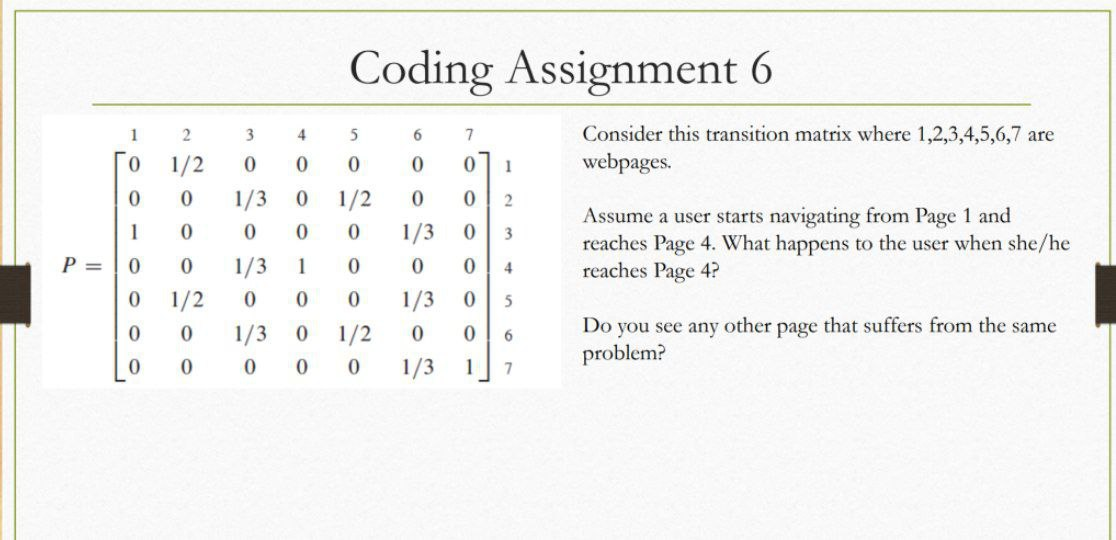

**Solution for Question 1:**

According to this matrix, Page 4 can be reached from Page 2 with a probability of 1/2 (50%) or from Page 3 with a probability of 1/3 (33.33%). After reaching Page 4, the user can only return to Page 1 with certainty (100% chance).


* If the user came from Page 2: There's a 50% chance they will return to Page 1.

* If the user came from Page 3: There's a 33.33% chance they will return to Page 1.

In either case, the user ultimately ends up back on Page 1. However, they cannot navigate further from Page 4, as there are no outgoing links from Page 4 to other pages. Therefore, the user effectively gets trapped in a loop between Pages 1 and 4, unable to explore other pages on the website.

**Question 2:**

Do you see any other page that suffers from the same problem?


Yes, besides Page 4, Page 7 suffers from a similar problem. Once a user reaches Page 7, they can only go back to Page 6 with certainty (100% chance), as there are no outgoing links from Page 7 to other pages. This creates a loop between Pages 6 and 7, trapping the user in a similar manner as the loop between Pages 1 and 4



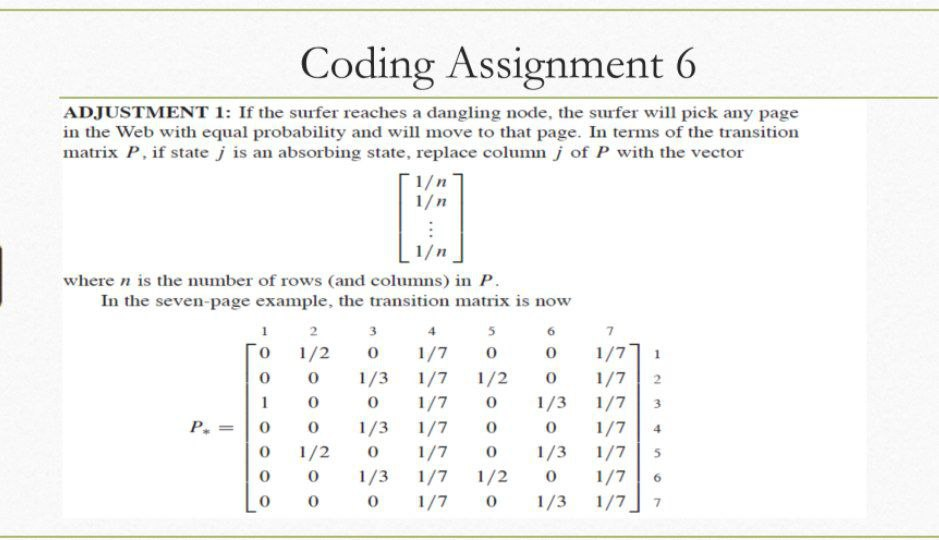

**ADJUSTMENT 1:**

To handle the case where a surfer reaches a dangling node and then picks any page in the Web with equal probability, we need to modify the transition matrix P such that columns corresponding to absorbing states (dangling nodes) are replaced with a uniform distribution. This ensures that the surfer has an equal chance of moving to any other page.

**Issue:**

**Dangling nodes:** Dangling nodes, also known as dangling pages or dead ends, are pages within a network (such as a website) that have no outgoing links or connections to other pages. In the context of a transition matrix representing web navigation, dangling nodes are represented by rows where all elements are zero, indicating that there are no links from that page to any other page in the network.

Dangling nodes pose a challenge in web navigation because once a user reaches a dangling node, they have no further options for navigation within the website. This can lead to a poor user experience as users may become stuck or frustrated if they reach a dead end while browsing.

**Solution:**

To prevent dangling nodes, we can modify the transition matrix so that there are no nodes with zero outgoing links. This ensures that the user can always navigate to other pages. One common method is to use a teleportation (or random jump) factor as part of the PageRank algorithm.

Here's how you can modify the transition matrix:

Identify Dangling Nodes: We check for rows where the sum is zero, indicating no outgoing links.
Modify the Transition Matrix: For each dangling node, replace the row with a uniform distribution (i.e., each element is 1/n),where n is the total number of pages.


In [ ]:
import numpy as np

# Original transition matrix
P = np.array([[0, 1/2, 0, 0, 0, 0, 0],
              [0, 0, 1/3, 0, 1/2, 0, 0],
              [1, 0, 0, 0, 0, 1/3, 0],
              [0, 0, 1/3, 1, 0, 0, 0],
              [0, 1/2, 0, 0, 0, 1/3, 0],
              [0, 0, 1/3, 0, 1/2, 0, 0],
              [0, 0, 0, 0, 0, 1/3, 1]])

# Total number of pages
n = P.shape[0]

# Identify dangling nodes
dangling_nodes = [i for i in range(n) if np.sum(P[i, :]) == 0]

# Modify the transition matrix to handle dangling nodes
for node in dangling_nodes:
    P[node, :] = 1 / n

print(" Transition Matrix P:")
print(P)


 Transition Matrix P:
[[0.         0.5        0.         0.         0.         0.
  0.        ]
 [0.         0.         0.33333333 0.         0.5        0.
  0.        ]
 [1.         0.         0.         0.         0.         0.33333333
  0.        ]
 [0.         0.         0.33333333 1.         0.         0.
  0.        ]
 [0.         0.5        0.         0.         0.         0.33333333
  0.        ]
 [0.         0.         0.33333333 0.         0.5        0.
  0.        ]
 [0.         0.         0.         0.         0.         0.33333333
  1.        ]]


In [ ]:
#Absorbing state columns
absorbing_states = [3, 7]  # Columns corresponding to Page 4 and Page 7

# Total number of pages
n = P.shape[0]

# Replace columns corresponding to absorbing states with equal probability vector
for state in absorbing_states:
    P[:, state-1] = 1 / n

print("Modified Transition Matrix P:")
print(P)

Modified Transition Matrix P:
[[0.         0.5        0.14285714 0.         0.         0.
  0.14285714]
 [0.         0.         0.14285714 0.         0.5        0.
  0.14285714]
 [1.         0.         0.14285714 0.         0.         0.33333333
  0.14285714]
 [0.         0.         0.14285714 1.         0.         0.
  0.14285714]
 [0.         0.5        0.14285714 0.         0.         0.33333333
  0.14285714]
 [0.         0.         0.14285714 0.         0.5        0.
  0.14285714]
 [0.         0.         0.14285714 0.         0.         0.33333333
  0.14285714]]


**ADJUSTMENT 2:**

To implement the described adjustment where the surfer has a probability p of following the links from the current page and a probability 1−p of jumping to any page in the web with equal probability, we create the new transition matrix G as follows:

**G=pP+(1−p)K**

Where:

1.P is the original transition matrix.

2.K is a matrix where each element is 1/n, representing the equal probability of jumping to any page.

3.p is the probability of following the links on the current page.

4.(1−p) is the probability of jumping to a random page.

**Steps to Create the Adjusted Transition Matrix G:**


1.Define the Original Transition Matrix P.

2.Create the Uniform Probability Matrix K.

3.Compute the New Transition Matrix G using the formula
G=pP+(1−p)K.


**Creating the Google Matrix:**

1.Original Transition Matrix (P): The given transition probabilities between pages.

2.Dangling Node Adjustment: If a node has no outgoing links, we adjust it to transition uniformly to all other pages.

3.Google Matrix (G): Incorporate a damping factor α (typically 0.85), allowing for random jumps to any page.

**Steps to Create the Google Matrix:**

1.Identify Dangling Nodes: Adjust the transition matrix so there are no dangling nodes.

2.Apply Damping Factor: Combine the adjusted transition matrix with a uniform probability matrix.

In [16]:
# Total number of pages
n = P.shape[0]

# Damping factor
p = 0.85

# Step 1: Adjust for dangling nodes
for i in range(n):
    if np.sum(P[i, :]) == 0:
        P[i, :] = 1 / n

# Step 2: Create the uniform probability matrix K
K = np.ones((n, n)) / n

# Step 3: Compute the Google Matrix G
G = p * P + (1 - p) * K

# Step 4: Compute the steady-state vector x
# Initialize x to a uniform distribution
x = np.ones(n) / n

# Power iteration method to find the dominant eigenvector
for _ in range(100):  # Iterate enough times to ensure convergence
    x = np.dot(G, x)

# Normalize the vector to ensure it's a probability distribution
x = x / np.sum(x)

print("Google Matrix G:")
print(G)



Google Matrix G:
[[0.02142857 0.44642857 0.02142857 0.02142857 0.02142857 0.02142857
  0.02142857]
 [0.02142857 0.02142857 0.3047619  0.02142857 0.44642857 0.02142857
  0.02142857]
 [0.87142857 0.02142857 0.02142857 0.02142857 0.02142857 0.3047619
  0.02142857]
 [0.02142857 0.02142857 0.3047619  0.87142857 0.02142857 0.02142857
  0.02142857]
 [0.02142857 0.44642857 0.02142857 0.02142857 0.02142857 0.3047619
  0.02142857]
 [0.02142857 0.02142857 0.3047619  0.02142857 0.44642857 0.02142857
  0.02142857]
 [0.02142857 0.02142857 0.02142857 0.02142857 0.02142857 0.3047619
  0.87142857]]


In [18]:
# Print steady state probabilities for each page
print("Steady-state vector x (PageRank):")
print(x)

Steady-state vector x (PageRank):
[0.05580865 0.08089429 0.09178597 0.31623064 0.07872869 0.08089429
 0.29565747]
